In [199]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### About this file   
This file contains the basic information (ID, age, gender, income, spending score) about the customers

* CustomerID    
Unique ID assigned to the customer

* Gender    
Gender of the customer

* Age    
Age of the customer

* Annual Income (k$)    
Annual Income of the customee

* Spending Score (1-100)    
Score assigned by the mall based on customer behavior and spending nature

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [202]:
df["CustomerID"]=df["CustomerID"].astype(str)

In [203]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [204]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


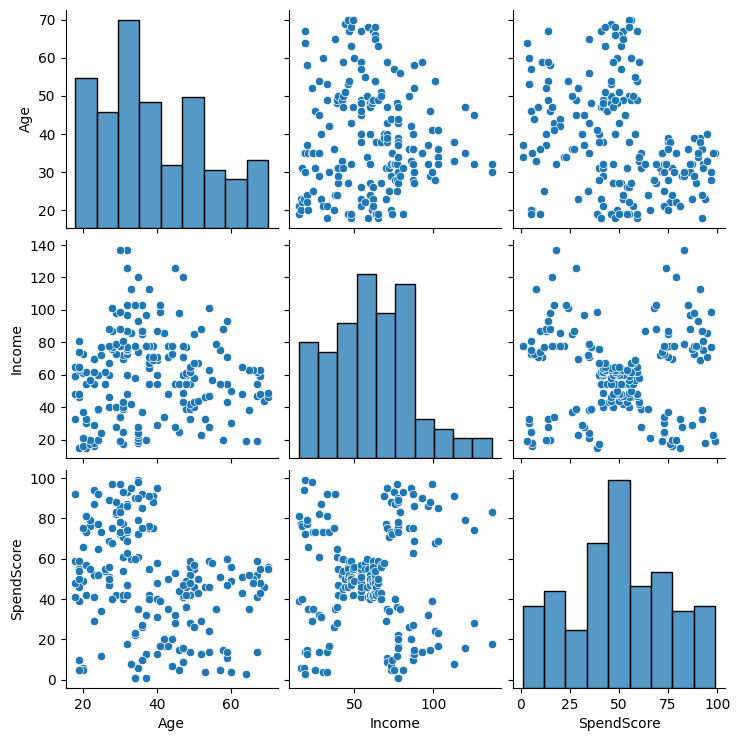

In [205]:
sns.pairplot(df)

In [206]:
df=df.drop(['CustomerID'],axis=1)

# DBSCAN

In [207]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [208]:
x=df.iloc[:,[2,3]].values

In [209]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [210]:
x.shape

(200, 2)

In [211]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

DBSCAN：匯入 Scikit-learn 中的 DBSCAN 分群算法。    
eps=3：定義「兩個點之間的最大距離」以被視為鄰居，控制簇的密度感知範圍。    
min_samples=4：一個點及其鄰居數量至少為 4 才能被認定為核心點。    
metric='euclidean'：使用歐幾里得距離作為距離度量標準。    

In [212]:
model=db.fit(x)

In [213]:
label=model.labels_

model.labels_：每個數據點所屬的簇標籤。    
若數據點屬於某個簇，會被標記為對應簇的編號（如 0, 1, 2...）。    
如果某點是「噪聲點」，則標記為 -1。    

In [214]:
label # -1有點多，可以考慮加大半徑

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [215]:
from sklearn import metrics

# 創建一個布爾陣列，長度與 label 一樣，所有值初始化為 False
sample_cores=np.zeros_like(label, dtype=bool)

# 將核心點對應的索引值設為 True，以標記哪些數據點是核心點。
sample_cores[db.core_sample_indices_]=True

# 若存在噪聲點（標籤為 -1），從簇數中減去 1。 輸出「有效簇數」，不包括噪聲點
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 9


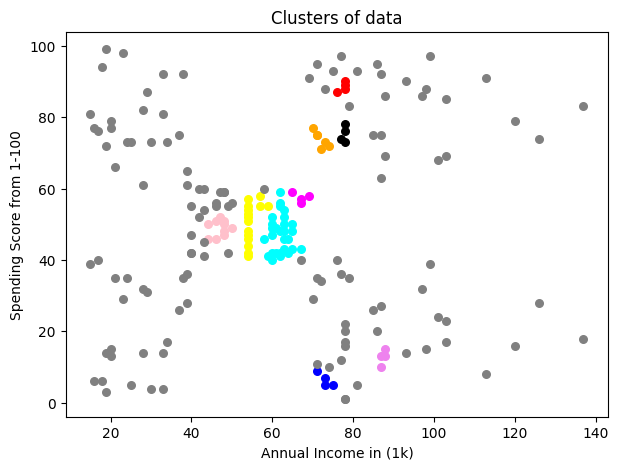

In [216]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 30, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 30, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 30, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 30, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 30, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 30, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 30, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 30, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 30, c = 'violet')
plt.scatter(x[y_means == -1, 0], x[y_means == -1, 1], s = 30, c = 'grey') # 噪音點
plt.xlabel('Annual Income in (1k)') # 年收入
plt.ylabel('Spending Score from 1-100') # 消費評分
plt.title('Clusters of data')
plt.show()